In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

PROCESSED_DIR = Path("data/processed")

mercer_clean = pd.read_csv(PROCESSED_DIR / "mercer_clean.csv")
api_clean    = pd.read_csv(PROCESSED_DIR / "api_clean.csv")

print("Mercer shape:", mercer_clean.shape)
print("API shape:", api_clean.shape)

display(mercer_clean.head())
display(api_clean.head())
# Import and load clean files

Mercer shape: (71, 7)
API shape: (7, 8)


,location_clean,job_title_clean,job_level_clean,p25_GBP,p50_GBP,p75_GBP,mkt_base_avg_GBP
0,London,Mobile Engineer,Senior,65182.0948,71944.8550,85015.8194,74047.589733
1,London,Mobile Engineer,Lead,87476.0651,88593.3182,90590.5172,88886.633500
2,London,UX Designer,Junior,42740.2442,46535.4578,49760.7136,46345.471867
3,London,UX Designer,Mid,42344.5234,49554.1926,53958.4365,48619.050833
4,London,UX Designer,Senior,60424.4016,73127.8896,82628.5589,72060.283367


,location_clean,job_title_clean,min_salary_annual_gbp,max_salary_annual_gbp,avg_salary_annual_gbp,confidence,publisher_name,source_file
0,Sweden,UX Designer,33436.80375,42128.89875,37782.851250,VERY_HIGH,Glassdoor,"ux-designer_malmo,-sweden.json"
1,Portugal,QA Engineer,13818.87500,27621.60000,20720.237500,VERY_HIGH,Glassdoor,"qa_engineer__lisbon,_portugal.json"
2,Portugal,Software Developer,16447.50000,27327.50000,21887.500000,VERY_HIGH,Glassdoor,"software_developer__lisbon,_portugal.json"
3,New York,Backend Engineer,97110.82400,170089.59200,133600.208000,CONFIDENT,Glassdoor,"backend_engineer__new_york,_usa.json"
4,Sweden,UX Designer,33433.61250,42129.28125,37781.446875,VERY_HIGH,Glassdoor,"ux_designer__malmo,_sweden.json"


In [78]:
mercer_for_merge = mercer_clean.rename(columns={
    "location_clean": "location",
    "job_title_clean": "job_title",
    "job_level_clean": "job_level",
    "mkt_base_avg_GBP": "salary_gbp"
}).copy()

mercer_for_merge["source"] = "Mercer"

cols_keep = ["location", "job_title", "job_level", "salary_gbp", "source"]
mercer_for_merge = mercer_for_merge[cols_keep]

mercer_for_merge.head(80)
# Prepare Mercer to combine with API

,location,job_title,job_level,salary_gbp,source
0,London,Mobile Engineer,Senior,74047.589733,Mercer
1,London,Mobile Engineer,Lead,88886.633500,Mercer
2,London,UX Designer,Junior,46345.471867,Mercer
3,London,UX Designer,Mid,48619.050833,Mercer
4,London,UX Designer,Senior,72060.283367,Mercer
...,...,...,...,...,...
66,New York,Full Stack Engineer,Principal,194919.051893,Mercer
67,New York,Full Stack Engineer,Head of,221618.732853,Mercer
68,New York,QA Engineer,Mid,83674.691040,Mercer
69,New York,QA Engineer,Senior,103660.299227,Mercer


In [79]:
api_for_merge = api_clean.rename(columns={
    "location_clean": "location",
    "job_title_clean": "job_title",
    "avg_salary_annual_gbp": "salary_gbp"
}).copy()

api_for_merge["job_level"] = np.nan
api_for_merge["source"] = "API"

api_for_merge = api_for_merge[
    ["location", "job_title", "job_level", "salary_gbp", "source"]
]
# Prepare API to combine with Mercer and create an empty job level column for the API

In [80]:
combined = pd.concat([mercer_for_merge, api_for_merge], ignore_index=True)

print("mercer:", mercer_for_merge.shape, 
      "api:", api_for_merge.shape, 
      "combined:", combined.shape)

combined.head(80)
# Visualize combined dataframe


mercer: (71, 5) api: (7, 5) combined: (78, 5)


,location,job_title,job_level,salary_gbp,source
0,London,Mobile Engineer,Senior,74047.589733,Mercer
1,London,Mobile Engineer,Lead,88886.633500,Mercer
2,London,UX Designer,Junior,46345.471867,Mercer
3,London,UX Designer,Mid,48619.050833,Mercer
4,London,UX Designer,Senior,72060.283367,Mercer
...,...,...,...,...,...
73,Portugal,Software Developer,NaN,21887.500000,API
74,New York,Backend Engineer,NaN,133600.208000,API
75,Sweden,UX Designer,NaN,37781.446875,API
76,New York,Frontend Engineer,NaN,123079.560000,API


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

In [82]:
from pathlib import Path
PROCESSED_DIR = Path("data/processed")

mercer_clean = pd.read_csv(PROCESSED_DIR / "mercer_clean.csv")
api_clean    = pd.read_csv(PROCESSED_DIR / "api_clean.csv")

mercer_for_merge = mercer_clean.rename(columns={
    "location_clean": "location",
    "job_title_clean": "job_title",
    "job_level_clean": "job_level",
    "mkt_base_avg_GBP": "salary_gbp"
}).copy()
mercer_for_merge["source"] = "Mercer"
mercer_for_merge = mercer_for_merge[["location","job_title","job_level","salary_gbp","source"]]

api_for_merge = api_clean.rename(columns={
    "location_clean": "location",
    "job_title_clean": "job_title",
    "avg_salary_annual_gbp": "salary_gbp"
}).copy()
api_for_merge["job_level"] = np.nan
api_for_merge["source"] = "API"
api_for_merge = api_for_merge[["location","job_title","job_level","salary_gbp","source"]]

combined = pd.concat([mercer_for_merge, api_for_merge], ignore_index=True)
combined.head(80)
# Load combined data

,location,job_title,job_level,salary_gbp,source
0,London,Mobile Engineer,Senior,74047.589733,Mercer
1,London,Mobile Engineer,Lead,88886.633500,Mercer
2,London,UX Designer,Junior,46345.471867,Mercer
3,London,UX Designer,Mid,48619.050833,Mercer
4,London,UX Designer,Senior,72060.283367,Mercer
...,...,...,...,...,...
73,Portugal,Software Developer,NaN,21887.500000,API
74,New York,Backend Engineer,NaN,133600.208000,API
75,Sweden,UX Designer,NaN,37781.446875,API
76,New York,Frontend Engineer,NaN,123079.560000,API


In [83]:
print("Counts by source")
display(combined["source"].value_counts())

print("\nUnique locations by source")
display(combined.groupby("source")["location"].nunique())

print("\nUnique job titles by source")
display(combined.groupby("source")["job_title"].nunique())

print("\nMercer levels distribution")
display(mercer_for_merge["job_level"].value_counts())
# First insights input

Counts by source


source
Mercer    71
API        7
Name: count, dtype: int64


Unique locations by source


source
API       3
Mercer    4
Name: location, dtype: int64


Unique job titles by source


source
API       5
Mercer    4
Name: job_title, dtype: int64


Mercer levels distribution


job_level
Senior       17
Lead         17
Mid          15
Principal     9
Head of       7
Junior        6
Name: count, dtype: int64

In [84]:
mercer_summary = (
    mercer_for_merge
    .groupby(["location","job_title","job_level"], as_index=False)["salary_gbp"]
    .mean()
)

mercer_summary.head()
# Mercer salary structure

,location,job_title,job_level,salary_gbp
0,Lisbon,Full Stack Engineer,Head of,103262.253910
1,Lisbon,Full Stack Engineer,Lead,49088.038220
2,Lisbon,Full Stack Engineer,Mid,32177.898237
3,Lisbon,Full Stack Engineer,Principal,61035.403393
4,Lisbon,Full Stack Engineer,Senior,43751.342007


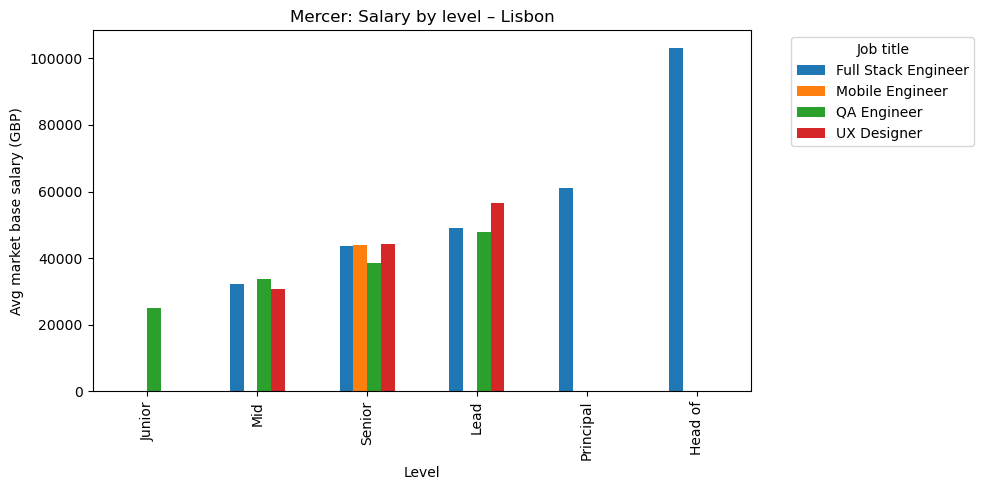

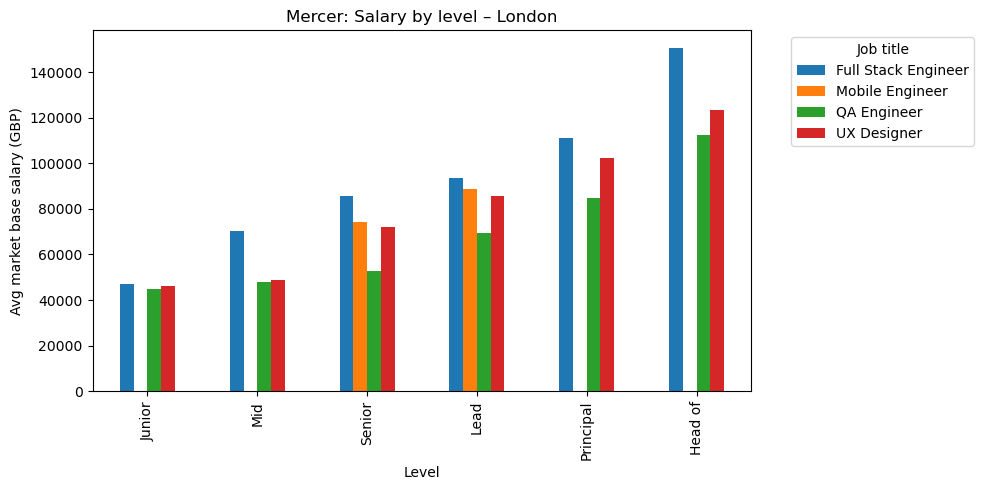

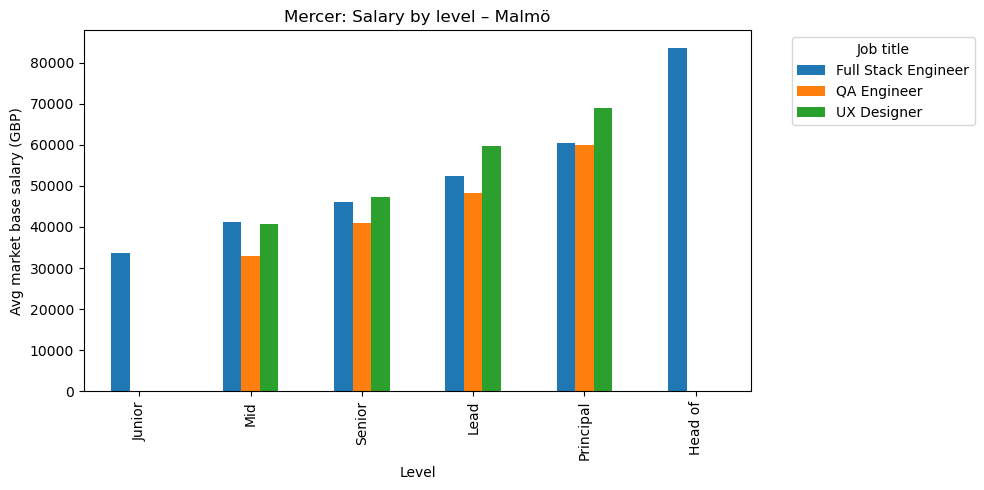

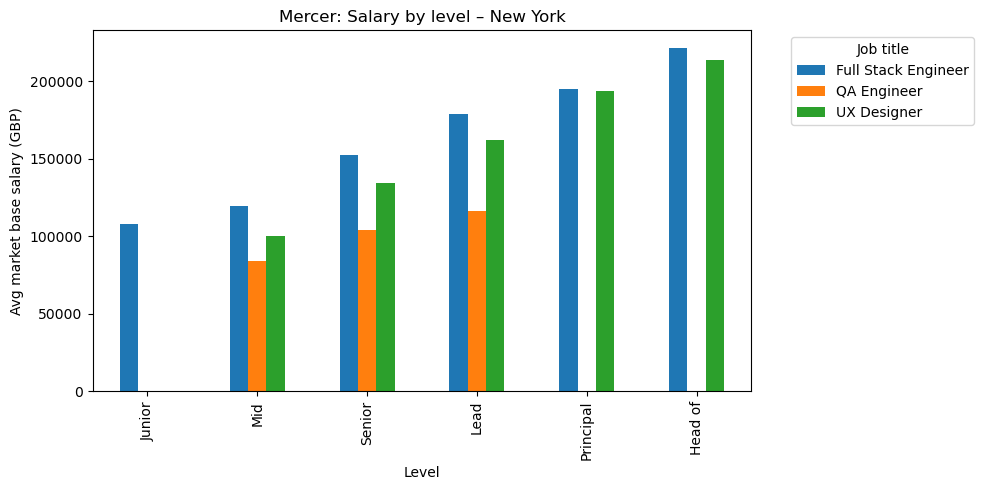

In [85]:
for loc in mercer_summary["location"].unique():
    subset = mercer_summary[mercer_summary["location"] == loc]
    pivot = subset.pivot(index="job_level", columns="job_title", values="salary_gbp")
    pivot = pivot.reindex(["Junior","Mid","Senior","Lead","Principal","Head of"])  

    pivot.plot(kind="bar")
    plt.title(f"Mercer: Salary by level – {loc}")
    plt.ylabel("Avg market base salary (GBP)")
    plt.xlabel("Level")
    plt.legend(title="Job title", bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [92]:
combined_clean = combined.copy()

def standardize_location_final(loc):
    if pd.isna(loc):
        return np.nan
    loc = str(loc).lower().strip()

    if "london" in loc or loc.startswith("gb") or "uk" in loc:
        return "London"

    if "lisbon" in loc or "portugal" in loc or loc.startswith("pt"):
        return "Portugal"

    if "malmo" in loc or "malmö" in loc or "lund" in loc or "sweden" in loc:
        return "Sweden"

    if "new york" in loc or "ny" in loc or "tri state" in loc:
        return "New York"

    if "tokyo" in loc or "japan" in loc:
        return np.nan

    return loc.title()

combined_clean["location_final"] = combined_clean["location"].apply(standardize_location_final)

if "location_clean" in combined_clean.columns:
    combined_clean["location_final"] = combined_clean["location_clean"].apply(standardize_location_final)
# Combined locations

In [94]:
title_map = {
    "software developer": "Full Stack Engineer",
    "software engineer": "Full Stack Engineer",
    "rsg - software - generalist": "Full Stack Engineer",
    "full stack engineer": "Full Stack Engineer",

    "qa engineer": "QA Engineer",
    "rqs - software quality assurance": "QA Engineer",

    "ux designer": "UX Designer",
    "rsi - user interface design": "UX Designer",
    "ruh - human factors engineering": "UX Designer",

    "mobile engineer": "Mobile Engineer",
    "rsm - mobile applications developer": "Mobile Engineer",
}

def standardize_title_final(t):
    if pd.isna(t):
        return np.nan
    t_low = str(t).lower().strip()
    return title_map.get(t_low, t)

combined_clean["job_title"] = combined_clean["job_title"].apply(standardize_title_final)

valid_titles = ["Full Stack Engineer", "QA Engineer", "UX Designer", "Mobile Engineer"]
combined_clean = combined_clean[combined_clean["job_title"].isin(valid_titles)]
# Combine Job Title

In [96]:
combined_clean = combined_clean.copy()

combined_clean["location_final"] = combined_clean["location"].apply(standardize_location_final)

if "location_clean" in combined_clean.columns:
    combined_clean["location_final"] = combined_clean["location_final"].fillna(
        combined_clean["location_clean"].apply(standardize_location_final)
    )

combined_clean["location_final"].value_counts(dropna=False)

location_final
Portugal    24
London      22
Sweden      16
New York    14
Name: count, dtype: int64

In [97]:
compare_df = (
    combined_clean
    .groupby(["location_final", "job_title", "source"], as_index=False)["salary_gbp"]
    .mean()
)

compare_pivot = compare_df.pivot_table(
    index=["location_final", "job_title"],
    columns="source",
    values="salary_gbp"
)

compare_pivot
# Compare on location and title

source                                       API         Mercer
location_final job_title                                       
London         Full Stack Engineer           NaN   93008.001611
               Mobile Engineer               NaN   81467.111617
               QA Engineer                   NaN   68526.323433
               UX Designer                   NaN   76639.193083
New York       Full Stack Engineer           NaN  162449.396747
               QA Engineer                   NaN  101118.921093
               UX Designer                   NaN  160655.551216
Portugal       Full Stack Engineer  21887.500000   51791.526779
               Mobile Engineer               NaN   43957.112727
               QA Engineer          20720.237500   37962.500112
               UX Designer                   NaN   46474.072575
Sweden         Full Stack Engineer           NaN   52917.336924
               QA Engineer                   NaN   45563.803163
               UX Designer          37782.149063   54195.296243

/var/folders/pl/qjnl2n816kd5trwzkx1r4f9r0000gp/T/ipykernel_31395/1237392343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_df["gap_api_vs_mercer_%"] = (gap_df["API"] - gap_df["Mercer"]) / gap_df["Mercer"] * 100


source                                       API        Mercer  \
location_final job_title                                         
Portugal       Full Stack Engineer  21887.500000  51791.526779   
               QA Engineer          20720.237500  37962.500112   
Sweden         UX Designer          37782.149063  54195.296243   

source                              gap_api_vs_mercer_%  
location_final job_title                                 
Portugal       Full Stack Engineer           -57.739226  
               QA Engineer                   -45.419197  
Sweden         UX Designer                   -30.285188

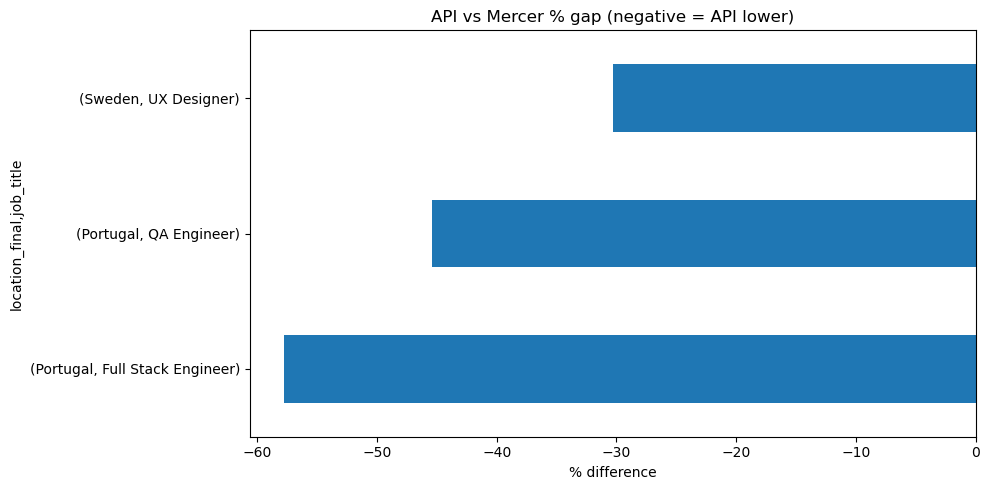

In [98]:
gap_df = compare_pivot.dropna()  # keep only overlaps

if gap_df.empty:
    print("No overlaps between API and Mercer yet. Add more API roles/locations to compare.")
else:
    gap_df["gap_api_vs_mercer_%"] = (gap_df["API"] - gap_df["Mercer"]) / gap_df["Mercer"] * 100
    gap_df = gap_df.sort_values("gap_api_vs_mercer_%")
    display(gap_df)

    gap_df["gap_api_vs_mercer_%"].plot(kind="barh")
    plt.title("API vs Mercer % gap (negative = API lower)")
    plt.xlabel("% difference")
    plt.tight_layout()
    plt.show()
# Key gaps

In [99]:
api_titles = set(api_for_merge["job_title"].unique())
mercer_titles = set(mercer_for_merge["job_title"].unique())

missing_in_api = sorted(mercer_titles - api_titles)
missing_in_mercer = sorted(api_titles - mercer_titles)

print("Job titles in Mercer but NOT in API:")
print(missing_in_api)

print("\nJob titles in API but NOT in Mercer:")
print(missing_in_mercer)
# API coverage missing

Job titles in Mercer but NOT in API:
['Full Stack Engineer', 'Mobile Engineer']

Job titles in API but NOT in Mercer:
['Backend Engineer', 'Frontend Engineer', 'Software Developer']


# First insights 

## Clear and consistent seniority pay progression
Across all locations, salaries rise with level of seniority. The jump is specially steep after Senior in most markets, meaning promotion impact grows at higher levels. 
- Senior to Lead jump is meaningful everywhere (+10 to 20K GPB)
- Principal/Head of levels show the largest jumps, often +20 to 40K compared to Lead
- This pattern suggests leveling framework is coherent cross-markets
## London is the strongest EU market in Mercer
London consistently shows the highest Mercer base salaries among EU location.
- For the same role + level, London sits above Portugal and Sweden
- By Senior/Lead, London bars are visibly higher for all roles
- This aligns with the expectation of higher cost of labor / demand in London relative to Portugal and Sweden hubs
## New York is clearly on the high end
New York salaries are much higher than all other markets across roles and levels.
- Even at Mid/Senior, New York exceeds London by a wide margin
- At Lead/Principal/Head of, the market pushes into very high salary ranges  
- Confirms a strong US geographic premium for tech talent
### Role hierarchy is stable across markets
Even though absolute values differ by location, role ranking is broadly consistent:
- Full Stack Engineer tends to be top-paid at senior levels  
- UX Designer and Mobile Engineer are close, swapping order by market/level  
- QA Engineer is lowest in most markets/levels (small quirks likely due to sample size)
## Initial API vs Mercer comparison shows API lower (but overlap is still tiny)
% gap plot only has three comparable points (Portugal Full Stack, Portugal QA, Sweden UX). All three show API salaries below Mercer:
- Portugal Full Stack about -55% to 60% vs Mercer
- Portugal QA about -45% vs Mercer 
- Sweden UX about -30% vs Mercer
So far, the outcome is that the API data (Glassdoor sourced) may under estimate the base salary compared to Mercer benchmarks, HOWEVER, these gaps are curently very few overlaps, so I'll treat them as directional and not conclusive.
## Data coverage mismatch is currently the main blocker
Mercer has strong coverage in EU and NY, but API coverage is concentrated in LIS, MAL and NY for some job titles, and missing for many Mercer combination. Next steps:
- Expand API pulls to match Mercer grid
- Extract/approximate seniority level from API job descriptions to enable level-based comparisons